In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [127]:
def create_noise(N, colored=False):        
    if colored:
        phi_0 = 1e-8  # amplitude of noise, aka stdPhaseNoise 
        Delta_psi = 0.18 # the peak of the spectrum

        psi_t_list = []
        psi_t = 0

        # parameters for ksi
        mean = 0.0
        std = 0.04
        for i in range(N):
            psi_t_list.append(psi_t)
            ksi = np.random.normal(mean, std)  # different seed on each turn
            psi_t = psi_t + 2 * np.pi * Delta_psi + 2 * np.pi * ksi

        # Construct the noise signal
        y = phi_0 * np.cos(psi_t_list)
        
    else:
        mu, stdPhaseNoise = 0, 1e-8
        y = np.random.normal(mu, stdPhaseNoise, N)
    
    return y

Text(0.5, 0, 'turns')

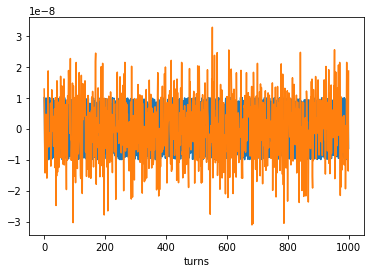

In [76]:
plt.plot(create_noise(1000, True))
plt.plot(create_noise(1000, False))
plt.xlabel('turns')

In [78]:
frev = 43.45e3
N = 1000
time = np.arange(N)/frev

In [79]:
y_colored = create_noise(N, True)
y_white = create_noise(N, False)

Text(0.5, 0, 'time (s)')

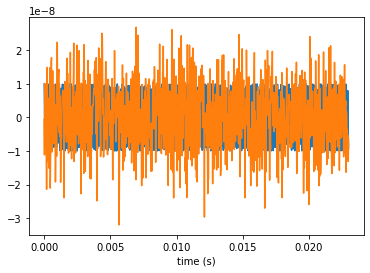

In [80]:
plt.plot(time, y_colored)
plt.plot(time, y_white)
plt.xlabel('time (s)')

In [81]:
Dt = time[1]-time[0]

In [82]:
energy_white_list = []
for i in range(100):
    y_white = create_noise(N, False)
    energy_white = np.sum(y_white**2)*Dt
    #print(energy_white)
    energy_white_list.append(energy_white)

In [83]:
total_power = np.mean(energy_white_list)/time[-1]
print(total_power)

1.0039079900933464e-16


In [84]:
np.var(y_white)

9.746345514011663e-17

In [85]:
# compute PSD

In [86]:
DFT = lambda k : np.sum(y_white*np.exp(-1j*2*np.pi*k*np.arange(N)/N))

In [87]:
my_dft = [DFT(k) for k in range(N)]

In [88]:
fft = np.fft.fft(y_white)

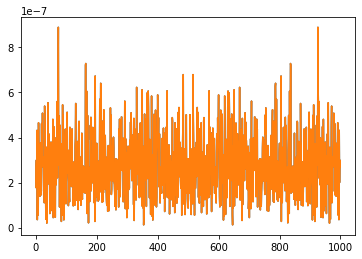

In [89]:
plt.plot(np.abs(my_dft))
plt.plot(np.abs(fft))

In [90]:
# Parseval's theorem 

In [91]:
freq = np.linspace(0, N/time[-1], N)

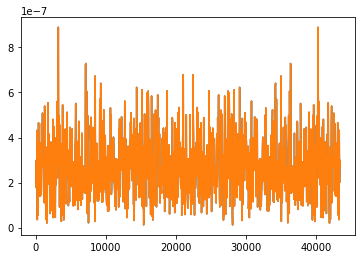

In [92]:
plt.plot(freq, np.abs(my_dft))
plt.plot(freq, np.abs(fft))

In [93]:
Df = freq[1]-freq[0]

In [94]:
power_white = np.sum(y_white**2)*Dt/time[-1]
power_white_fft = np.sum(np.abs(my_dft)**2)/N**2
print(power_white)
print(power_white_fft)

9.759295869728703e-17
9.749536573858842e-17


In [116]:
fft_list = []
for i in range(10000):
    y_white = create_noise(N, False)
    fft = np.fft.fft(y_white)
    fft_list.append(fft)

In [117]:
mean_dft = np.mean(np.abs(fft_list), axis=0)
PSD = mean_dft**2/(Df*N**2)

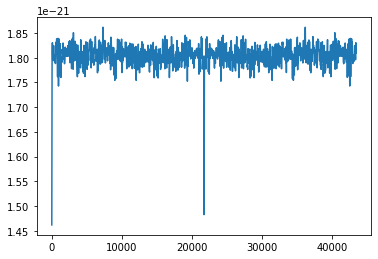

In [118]:
plt.plot(freq, PSD)

In [121]:
print(PSD[300])

1.795161043751793e-21


In [107]:
# colored noise

In [128]:
fft_list = []
for i in range(10000):
    y_white = create_noise(N, True)
    fft = np.fft.fft(y_white)
    fft_list.append(fft)

In [129]:
mean_dft = np.mean(np.abs(fft_list), axis=0)
PSD = mean_dft**2/(Df*N**2)

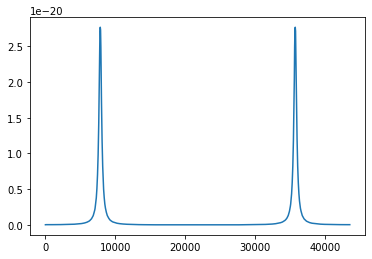

In [130]:
plt.plot(freq, PSD)

In [131]:
PSD[180]

2.7639543398709724e-20